# Описание располагаемых данных

|Признак|Описание|
|------:|:-------|
|`id` | идентификатор объекта|
|`object_name` | название объекта общественного питания|
|`address` | адрес|

Инструкция:

Шаг 1.  Изучите материалы лекционных и практических занятий по теме 5.1-5.3.

Шаг 2. Создайте аналитическую программу, которая считывает текст из файла (Алгоритм выполнения представлен в практическом занятии (мастер-классе) по теме 5.3).

Шаг 3. Реализуйте алгоритм предварительной обработки данных, который подсчитывает количество вхождений слов (Алгоритм выполнения представлен в практическом занятии (мастер-классе) по теме 5.3). Посчитайте количество вхождений для следующего набора слов
```python
'улица', 'переулок', 'шоссе', 'площадь', 'бульвар', 'проезд', 'тупик', 'просек', 'проспект', 'набережная', 'аллея', 'квартал', 'линия'
```

Шаг 4. Используя библиотеку matplotlib, визуализируйте полученные результаты (Алгоритм выполнения представлен в практическом занятии (мастер-классе) по теме 5.3). 

Шаг 5. Опубликуйте ссылку на файл расширения ipynb, прикрепив его в этом задании.

In [108]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv("dataset_address.csv")
df

,id,object_name,address
0,151635,СМЕТАНА,"город Москва, улица Егора Абакумова, дом 9"
1,77874,Родник,"город Москва, улица Талалихина, дом 2/1, корпус 1"
2,24309,Кафе «Академия»,"город Москва, Абельмановская улица, дом 6"
3,21894,ПИЦЦЕТОРИЯ,"город Москва, Абрамцевская улица, дом 1"
4,119365,Кафе «Вишневая метель»,"город Москва, Абрамцевская улица, дом 9, корпус 1"
...,...,...,...
15361,208537,Шоколадница,"город Москва, 3-й Крутицкий переулок, дом 18"
15362,209264,Шоколадница,"город Москва, улица Земляной Вал, дом 33"
15363,209186,Шоколадница,"город Москва, улица Земляной Вал, дом 33"
15364,221900,Шоколадница,"город Москва, поселение Московский, Киевское ш..."


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   address      15366 non-null  object
dtypes: int64(1), object(2)
memory usage: 360.3+ KB


In [110]:
df.duplicated().sum()

0

In [118]:
words_dict = {'улица': 0, 
             'переулок' : 0, 
             'шоссе': 0, 
             'площадь': 0, 
             'бульвар': 0, 
             'проезд': 0, 
             'тупик': 0, 
             'просек': 0, 
             'проспект': 0, 
             'набережная': 0, 
             'аллея': 0, 
             'квартал': 0, 
             'линия': 0}

for col in df.select_dtypes(include=['object']).columns:
  for w in words_dict:
    words_dict[w] += df.loc[df[col].str.contains(w, case = False)].shape[0]

words_dict = dict(sorted(words_dict.items(), key=lambda item : item [1]))

print(f"Количество найденых совпадений в исходном DataFrame: {words_dict}")

Количество найденых совпадений в исходном DataFrame: {'просек': 4, 'линия': 9, 'тупик': 15, 'квартал': 21, 'аллея': 50, 'площадь': 385, 'набережная': 390, 'переулок': 726, 'бульвар': 763, 'проезд': 794, 'шоссе': 1341, 'проспект': 1483, 'улица': 9094}


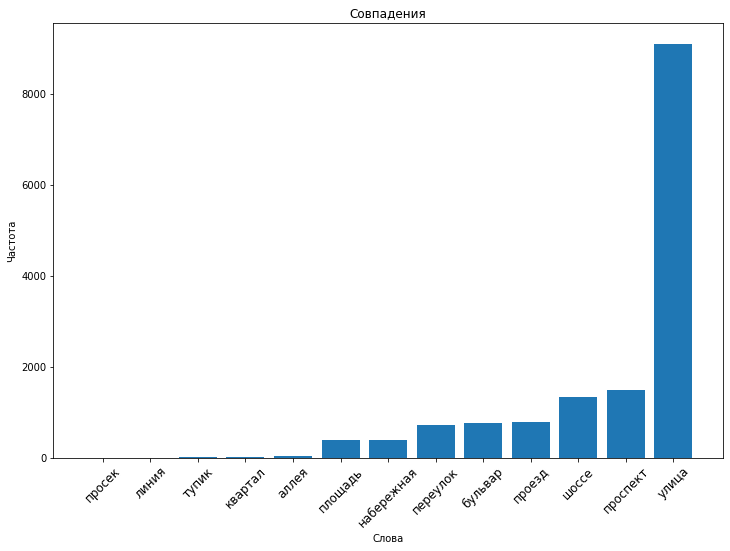

In [119]:
fig = plt.figure(figsize=(12,8));
plt.bar(words_dict.keys(), words_dict.values())
plt.xticks(rotation = 45,fontsize = 12);
plt.title("Совпадения");
plt.ylabel("Частота");
plt.xlabel("Слова");